## Objective: 
Develop a predictive model to estimate Student's Performance using linear regression.

### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:

- **Hours Studied:** The total number of hours spent studying by each student.
- **Previous Scores:** The scores obtained by students in previous tests.
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours:** The average number of hours of sleep the student had per day.
- **Sample Question Papers Practiced:** The number of sample question papers the student practiced.


#### Target Variable:

- **Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

P.S: Please note that this dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data=pd.read_csv('Student_Performance.csv')

## Explore Data

In [3]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Data Structure

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Statistical Summary

In [5]:
data.describe(exclude="object")

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
data.describe(include="object")

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


## Missing Values

In [7]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## Duplicates

In [8]:
data.duplicated().sum()

127

## Encoding

In [9]:
# onehot/dummy Encoding
#Label Encode can also be applied
data=pd.get_dummies(data,columns=['Extracurricular Activities'],dtype=int)

In [10]:
data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0
...,...,...,...,...,...,...,...
9995,1,49,4,2,23.0,0,1
9996,7,64,8,5,58.0,0,1
9997,6,83,8,5,74.0,0,1
9998,9,97,7,0,95.0,0,1


In [11]:
data.drop(columns=['Extracurricular Activities_No'],inplace=True) #drop=First

In [12]:
data

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,1
9996,7,64,8,5,58.0,1
9997,6,83,8,5,74.0,1
9998,9,97,7,0,95.0,1


## Correlation Matrix

In [13]:
cor=data.corr()

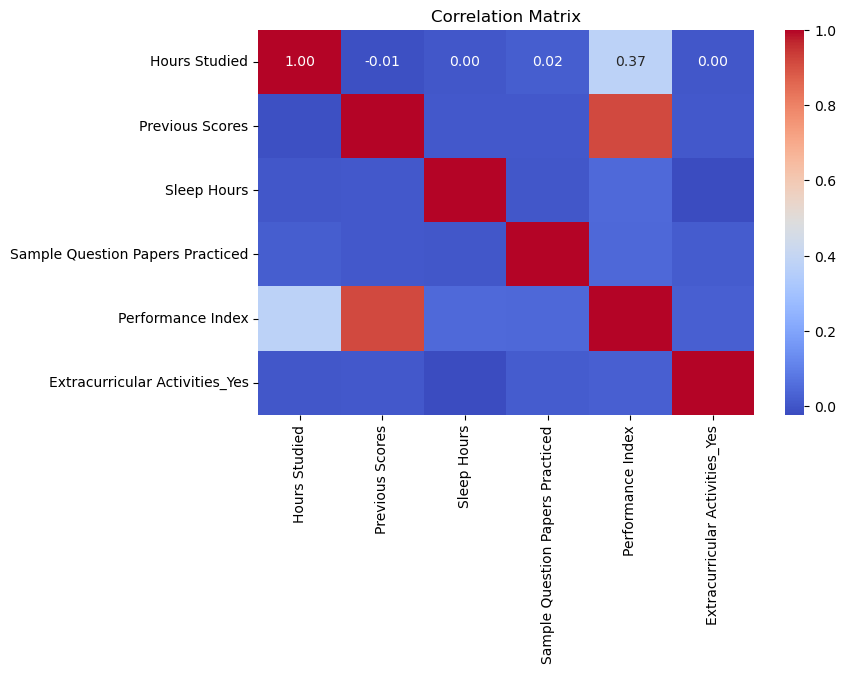

In [14]:
# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


## Distribution

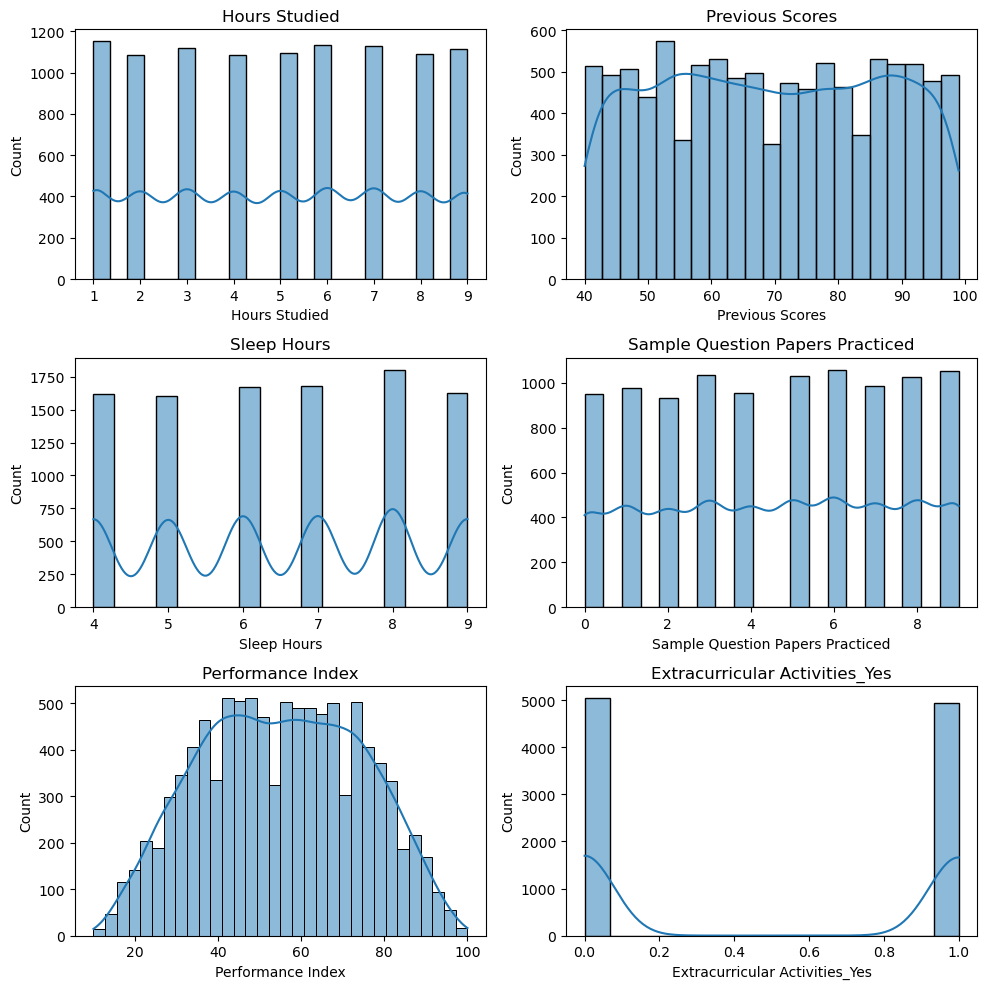

In [15]:
plt.figure(figsize=(10,10))

for i,col in enumerate(data.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(data[col],kde=True)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

## Normality Test

In [16]:
from scipy import stats

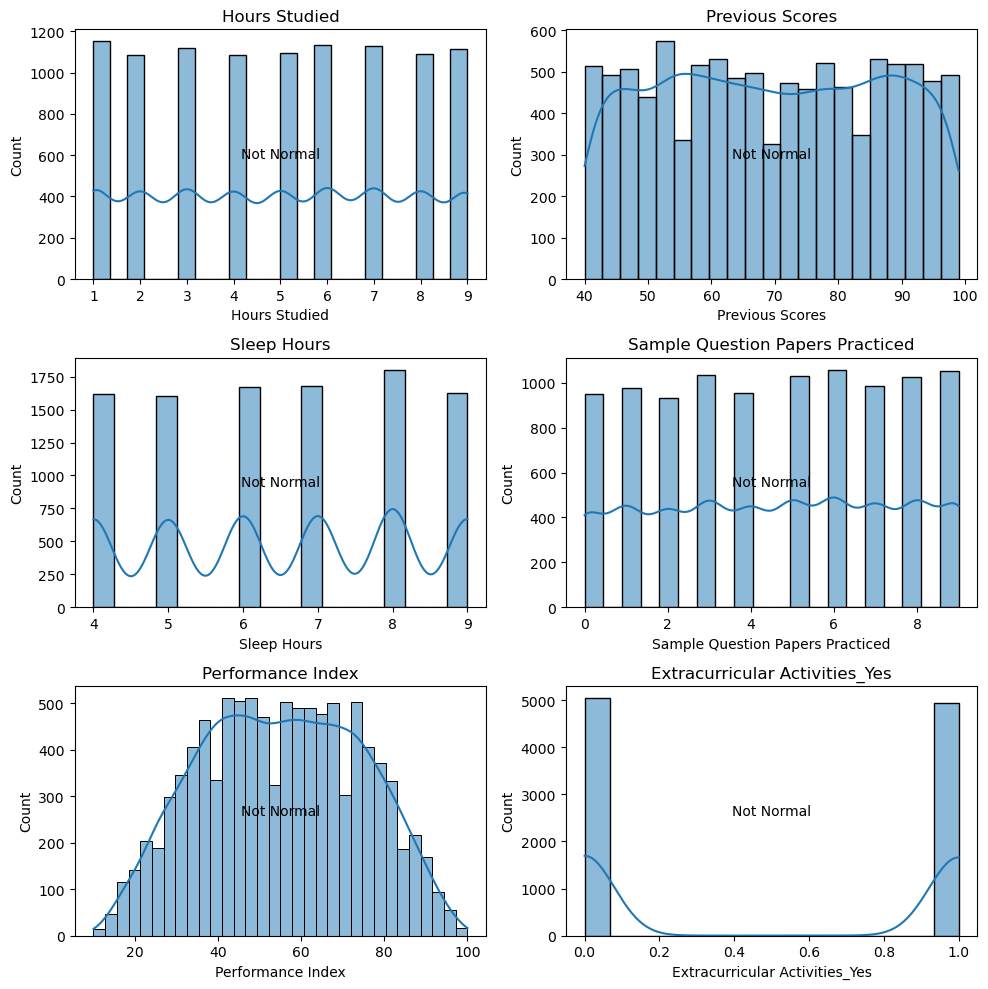

In [17]:
plt.figure(figsize=(10,10))

for i,col in enumerate(data.columns):
    plt.subplot(3,2,i+1)
    sns.histplot(data[col],kde=True)
    plt.title(f'{col}')
    # Check for normal distribution
    k2,p=stats.normaltest(data[col])
    #print(k2, p )
    # null hyposthesis => The sample is from Normal dsitribution
    if(p>0.5):
         plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    
plt.tight_layout()
plt.show()

## Skewness Checking

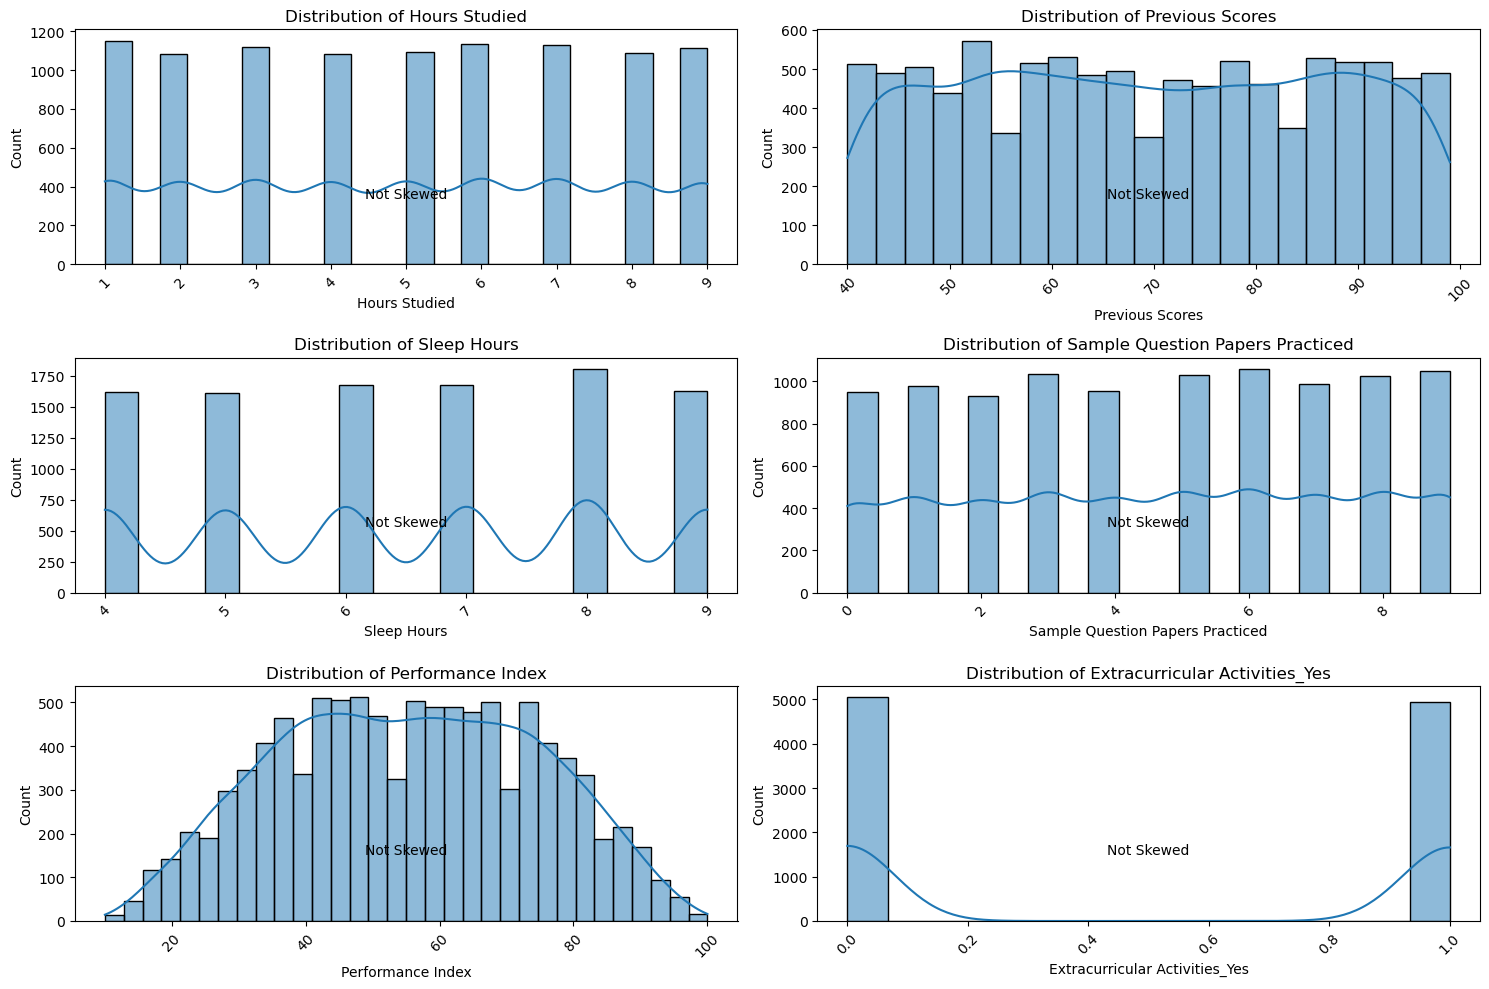

In [18]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    
    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## OutLiers

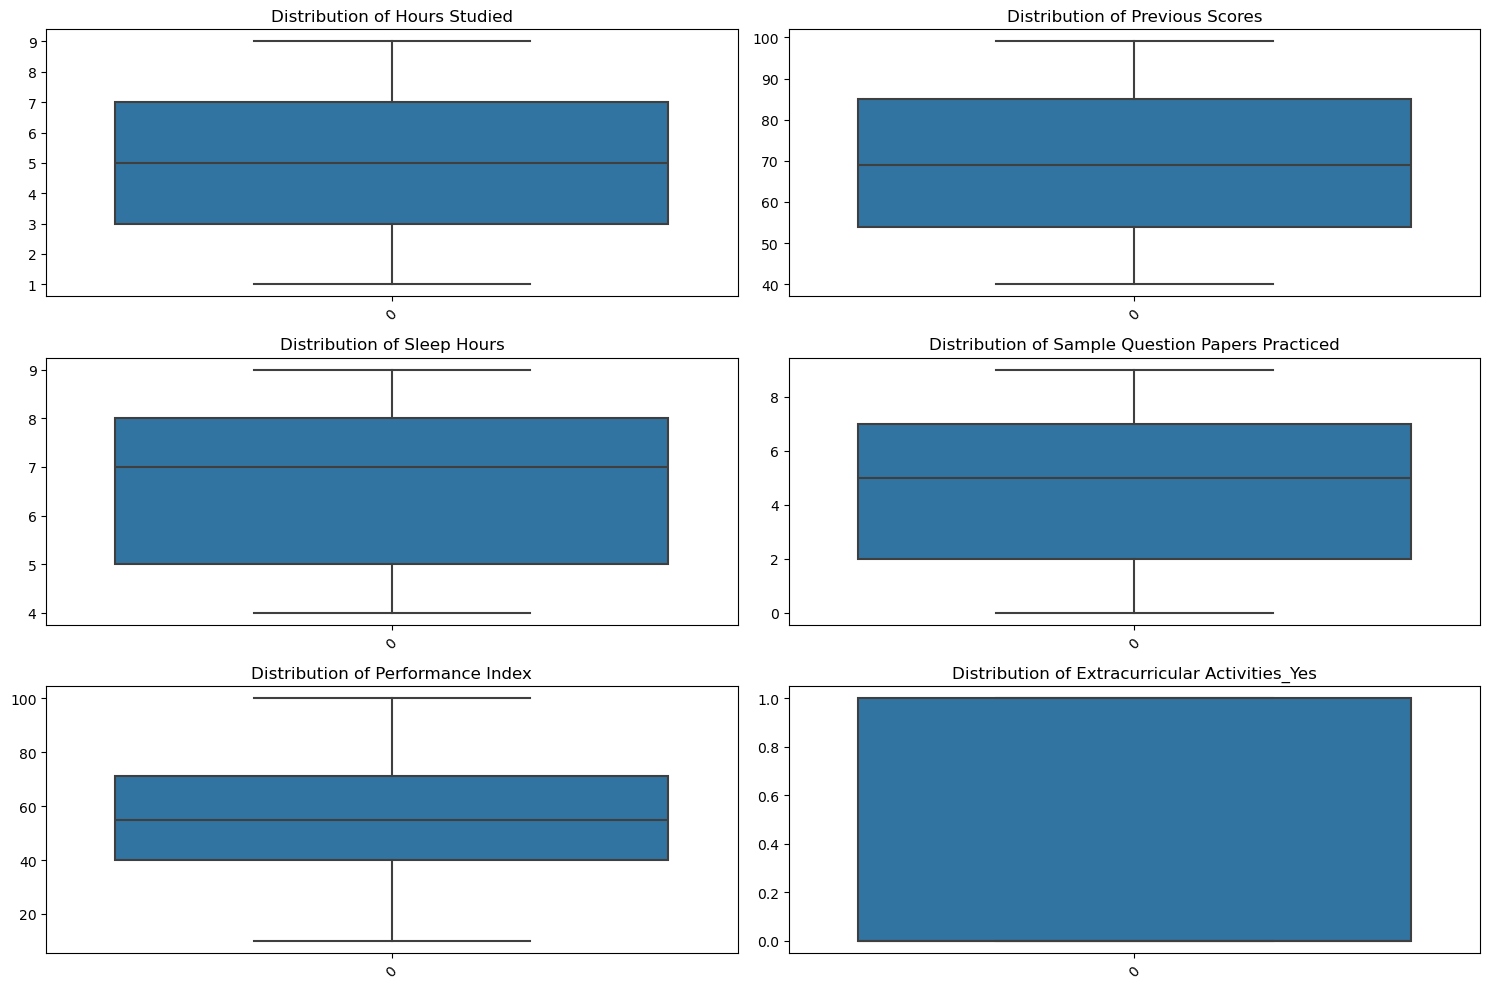

In [19]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, col in enumerate(data.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
   
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

- **From Normalization Test we get to know that we dont have to apply standardization**
- **We will be using Normalization test to Scale**

## Multiple linear regression:

Multiple linear regression extends the principles of simple linear regression to scenarios where there are multiple independent variables influencing a single dependent variable. It's a powerful tool for understanding the relationships between several factors and how they collectively impact an outcome.

In multiple linear regression, the model seeks to find the best-fitting hyperplane through the multidimensional space of predictors to explain the variance in the dependent variable. Each independent variable contributes its own weight, represented by a coefficient \( b_n \), to the overall prediction. The model also includes a constant term \( b_0 \), analogous to the y-intercept in simple linear regression.

The equation for multiple linear regression can be expressed as:

\[ y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n \]

Here, \( y \) represents the dependent variable, and \( x_1, x_2, ..., x_n \) represent the independent variables. Each \( b_n \) signifies the impact of the corresponding independent variable on the dependent variable, while \( b_0 \) captures the baseline value of \( y \) when all independent variables are zero.

By estimating the coefficients, the model can make predictions about the dependent variable based on specific values of the independent variables. The process of finding the optimal coefficients typically involves minimizing the sum of squared differences between the observed and predicted values, a method known as least squares regression.

Multiple linear regression is widely used across various fields, including economics, social sciences, engineering, and more. It enables researchers and analysts to uncover intricate relationships within complex datasets and make informed decisions based on predictive insights.

In [20]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


#### **Defining Feature and Target**

In [21]:
# we dont normalize Target
X=data.drop(columns=['Performance Index']) #Features
y=data['Performance Index']  #Target

In [22]:
X.head(2)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1
1,4,82,4,2,0


In [23]:
y.head(2)

0    91.0
1    65.0
Name: Performance Index, dtype: float64

### Spliting Dataset into training and testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


### **Feature Scaling**

In [27]:
#Normalization Technique
from sklearn.preprocessing import MinMaxScaler

In [28]:
scalar=MinMaxScaler()

In [29]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

### **Implementing Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

### **Predictions**

In [33]:
y_predict=model.predict(X_test)

In [34]:
len(y_predict)

2000

In [35]:
pd.DataFrame({'Actual Prediction' : y_test , 'Predictions':y_predict})

,Actual Prediction,Predictions
6252,51.0,54.711854
4684,20.0,22.615513
1731,46.0,47.903145
4742,28.0,31.289767
4521,41.0,43.004570
...,...,...
6412,45.0,46.886280
8285,66.0,62.698025
7853,16.0,16.793420
1095,65.0,63.343274


### Evaluation Metrics

1. **R-squared (R2) Score:**
   - The R2 score, or coefficient of determination, measures the proportion of the variance in the dependent variable (y_test) that is predictable from the independent variable (y_pred).
   - It provides an indication of the goodness of fit of the model. The score ranges from 0 to 1, where 1 indicates a perfect fit.
   - The formula for R2 score is: 
$$ R2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{test},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{test},i} - \bar{y}_{\text{test}})^2} $$

     - $ \bar{y}_{\text{test}}$  is the mean of the actual values (y_test).

   - In simpler terms, R2 represents the proportion of the variance in the actual values that is captured by the model. A higher R2 score suggests a better fit.
   - Ranges from 0 to 1, with higher values indicating a better fit.



2. **Mean Squared Error (MSE):**
   - The MSE, or mean squared error, is a measure of how much the predicted values differ from the actual values in a set of data.
   - It calculates the average of the squared differences between the predicted values (y_pred) and the actual values (y_test).
   - The formula for MSE is: 
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{test},i} - y_{\text{pred},i})^2
$$

   - In simpler terms, it quantifies how "wrong" the model's predictions are on average.
   - Higher values indicate greater errors.
   

3. **Mean Absolute Error (MAE):**
   - The MAE, or mean absolute error, measures the average magnitude of errors in a set of predictions, without considering their direction (positive or negative).
   - It calculates the average of the absolute differences between the predicted values (y_pred) and the actual values (y_test).
   - The formula for MAE is:
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{\text{test},i} - y_{\text{pred},i}|
$$
   - In simpler terms, it quantifies how "wrong" the model's predictions are on average, with higher values indicating greater errors. Unlike MSE, it does not square the errors, so large errors are not as heavily penalized.
   - Higher values indicate greater errors.

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
r2=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)

In [38]:
print('R2_Score',r2)
print('MSE',mse)
print('MAE',mae)

R2_Score 0.9889832909573145
MSE 4.082628398521859
MAE 1.6111213463123053


## Training vs Testing

In [39]:
# Calculating score of model on trainig
model.score(X_train,y_train)

0.9886898790682355

In [40]:
model.score(X_test,y_test)

0.9889832909573145

In [41]:
import seaborn as sns

<Axes: xlabel='Performance Index', ylabel='Density'>

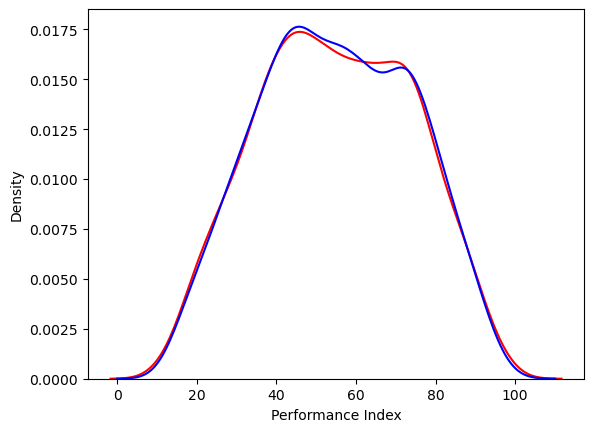

In [42]:
#Graph
sns.distplot(y_test,hist=False,color='red',label='Actual Value')
sns.distplot(y_predict,hist=False,color='blue',label='Predicted Value')

### **Model Interpretation**
**y=mx+c**
- c
- m values

In [43]:
model.coef_

array([22.81987144, 60.00230374,  2.38470742,  1.72648297,  0.60861668])

In [44]:
coeffients=pd.DataFrame(model.coef_,X.columns,columns=['Coeffient'])
coeffients

,Coeffient
Hours Studied,22.819871
Previous Scores,60.002304
Sleep Hours,2.384707
Sample Question Papers Practiced,1.726483
Extracurricular Activities_Yes,0.608617


In [45]:
model.intercept_

11.517831608538565

### Cross-validation on the linear regression model

In [53]:
from sklearn.model_selection import cross_val_score, KFold
# Automaticallyis
# if model is trained on data 90,80,91   and predicted on 22 33 44 so it's error
#in such cases we use cross validation to train data on every data
lm = LinearRegression()
scores = cross_val_score(lm, X,y, scoring='r2', cv=5)
scores  

array([0.98879624, 0.98827438, 0.9891418 , 0.989087  , 0.98836991])

### Manual implementation of cross-validation

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training set
    lm.fit(X_train_cv, y_train_cv)

    # Predict on the test set
    y_pred_cv = lm.predict(X_test_cv)

    # Calculate R² for each fold
    r = r2_score(y_test_cv, y_pred_cv)
    r2_scores.append(r)

    
    #Condition if you want to stop the folds on desired R2 scored
 #   if (r > 0.79):
  #      break
    

# Calculate the average R² across all folds
print([round(value,4) for value in r2_scores])
print("mean R2: ",np.mean(r2_scores))


[0.989, 0.9885, 0.9888, 0.9885, 0.9888]
mean R2:  0.9887318147125868


## **Basic Deployement**

In [50]:
def predict_student_performance(model, scalar):
    # Input data from user
    hours_studied = float(input("Enter hours studied: "))
    previous_scores = float(input("Enter previous scores: "))
    extracurricular_activities = input("Participates in extracurricular activities (Yes/No): ").strip().lower()
    sleep_hours = float(input("Enter sleep hours: "))
    sample_question_papers_practiced = int(input("Enter number of sample question papers practiced: "))
    
    # Convert categorical input to numerical
    extracurricular_activities = 1 if extracurricular_activities.lower() == 'yes' else 0
    
    # Create a dataframe for the input data
    input_data = pd.DataFrame([[hours_studied, previous_scores, sleep_hours, sample_question_papers_practiced, extracurricular_activities]],
                              columns=['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_Yes'])
    # Scale the input data  Standardization tecnique
    input_data_scaled = scalar.transform(input_data)
    print(input_data_scaled)
    # Predict performance
    prediction = model.predict(input_data_scaled)
    
    return prediction[0]

In [49]:
predicted_performance = predict_student_performance(model, scalar)
print(f"Predicted Performance Index: {predicted_performance:.2f}")

Enter hours studied:  8
Enter previous scores:  88
Participates in extracurricular activities (Yes/No):  No
Enter sleep hours:  8
Enter number of sample question papers practiced:  10


[[0.875      0.81355932 0.8        1.11111111 0.        ]]
Predicted Performance Index: 84.13
